**Project Title: Analyzing Trends in Global Happiness and Its Correlation with Socioeconomic Factors**

This project focuses on predicting the **Happiness Score** of countries based on various key social and economic indicators. The analysis utilizes a dataset from the **[Kaggle](https://www.kaggle.com/code/mrisdal/happiness-and-open-data/input)**, which includes several influential factors such as:

- **GDP per Capita**
- **Healthy Life Expectancy**
- **Social Support**
- **Freedom to Make Life Choices**
- **Perception of Corruption**
- **Generosity**

By employing **Linear Regression**, the project aims to explore the relationships between these socioeconomic factors and a country's overall happiness score. The objective is to build a predictive model capable of estimating happiness scores based on these features. This work not only seeks to identify trends and correlations within the data but also to evaluate the model's accuracy and performance in predicting happiness across different nations.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
dataset1 = pd.read_csv("2015.csv")
dataset2 = pd.read_csv("2016.csv")
dataset3 = pd.read_csv("2017.csv")
dataset4 = pd.read_csv("2018.csv")
dataset5 = pd.read_csv("2019.csv")

In [ ]:
print(dataset1.columns)
print(dataset2.columns)
print(dataset3.columns)
print(dataset4.columns)
print(dataset5.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Fre

**Data Transformation**

The dataset used in this project spans from 2015 to 2019, with each year's data provided in separate CSV files. The first step was to **merge these individual files** into a single comprehensive dataset. However, a few challenges arose during this process:

1. **Extra Columns:** Some of the CSV files contained additional columns that were not necessary for our analysis. These were removed to maintain consistency across all datasets.
   
2. **Inconsistent Column Names:** The column names were not uniform across the different CSV files. To ensure uniformity, we renamed the columns to match the standard naming convention used throughout the dataset.

3. **Different Column Order:** The order of columns varied between the files, so we reordered the columns to ensure they followed the same structure in each dataset.

After addressing these issues, the final step was to **merge** all the cleaned datasets into one cohesive dataset, creating a comprehensive dataset that spans across all five years (2015-2019) with consistent column names and structure for further analysis.

In [ ]:
dataset1.drop(["Standard Error","Region",'Dystopia Residual'], axis=1, inplace=True)
dataset2.drop(["Region","Lower Confidence Interval", "Upper Confidence Interval", 'Dystopia Residual'], axis=1, inplace=True)
dataset3.drop(['Whisker.high','Whisker.low', 'Dystopia.Residual'], axis=1, inplace=True)

In [ ]:

dataset1.rename(columns={'Economy (GDP per Capita)':'GDP per capita',
                         'Health (Life Expectancy)':'Healthy life expectancy',
                         'Trust (Government Corruption)':'Perceptions of corruption',
                         'Family':'Social support'}, inplace=True)

dataset2.rename(columns={'Economy (GDP per Capita)':'GDP per capita',
                         'Health (Life Expectancy)':'Healthy life expectancy',
                         'Trust (Government Corruption)':'Perceptions of corruption',
                         'Family':'Social support'}, inplace=True)

dataset3.rename(columns={"Happiness.Rank":"Happiness Rank", "Happiness.Score": "Happiness Score",
                         'Economy..GDP.per.Capita.':'GDP per capita',
                         'Health..Life.Expectancy.':'Healthy life expectancy',
                         'Trust..Government.Corruption.':'Perceptions of corruption',
                         'Family':'Social support'},inplace=True)

dataset4.rename(columns={"Country or region": "Country", "Overall rank":"Happiness Rank", "Score":"Happiness Score",
                         "Freedom to make life choices":"Freedom"}, inplace=True)
dataset5.rename(columns={"Country or region": "Country", "Overall rank":"Happiness Rank", "Score":"Happiness Score",
                         "Freedom to make life choices":"Freedom"}, inplace=True)

In [ ]:
new_order = ['Country', 'Happiness Rank', 'Happiness Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy', 'Freedom',
       'Perceptions of corruption', 'Generosity']
dataset4 = dataset4[new_order]
dataset5 = dataset5[new_order]

In [ ]:
dataset1['year'] = '2015'
dataset2['year'] = '2016'
dataset3['year'] = '2017'
dataset4['year'] = '2018'
dataset5['year'] = '2019'

In [ ]:
print(dataset1.columns)
print(dataset2.columns)
print(dataset3.columns)
print(dataset4.columns)
print(dataset5.columns)

Index(['Country', 'Happiness Rank', 'Happiness Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy', 'Freedom',
       'Perceptions of corruption', 'Generosity', 'year'],
      dtype='object')
Index(['Country', 'Happiness Rank', 'Happiness Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy', 'Freedom',
       'Perceptions of corruption', 'Generosity', 'year'],
      dtype='object')
Index(['Country', 'Happiness Rank', 'Happiness Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy', 'Freedom', 'Generosity',
       'Perceptions of corruption', 'year'],
      dtype='object')
Index(['Country', 'Happiness Rank', 'Happiness Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy', 'Freedom',
       'Perceptions of corruption', 'Generosity', 'year'],
      dtype='object')
Index(['Country', 'Happiness Rank', 'Happiness Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy', 'Freedo

In [ ]:
dataset = pd.concat([dataset1, dataset2, dataset3, dataset4, dataset5], ignore_index=True)
dataset.head()

,Country,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity,year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [ ]:
len(dataset)

782

In [ ]:
dataset.isnull().sum()

,0
Country,0
Happiness Rank,0
Happiness Score,0
GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom,0
Perceptions of corruption,1
Generosity,0
year,0


In [ ]:
dataset['Perceptions of corruption'] = dataset['Perceptions of corruption'].fillna(dataset['Perceptions of corruption'].median())

In [ ]:
dataset.drop_duplicates(inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    782 non-null    object 
 1   Happiness Rank             782 non-null    int64  
 2   Happiness Score            782 non-null    float64
 3   GDP per capita             782 non-null    float64
 4   Social support             782 non-null    float64
 5   Healthy life expectancy    782 non-null    float64
 6   Freedom                    782 non-null    float64
 7   Perceptions of corruption  782 non-null    float64
 8   Generosity                 782 non-null    float64
 9   year                       782 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 61.2+ KB


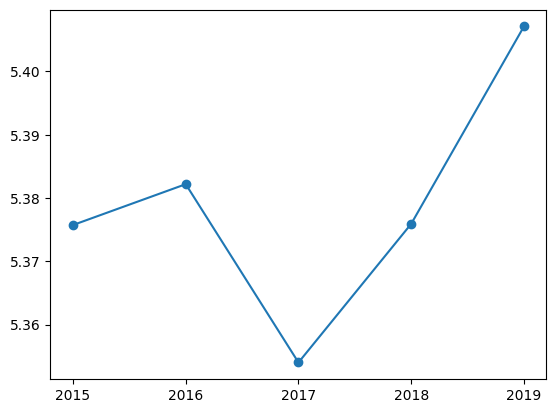

In [ ]:
yearly_avg_happiness = dataset.groupby("year")['Happiness Score'].mean()
plt.plot(yearly_avg_happiness.index, yearly_avg_happiness.values,marker='o')
plt.show()

The plot illustrates the trend of the average Happiness Score over the years. In 2015, the average score was slightly higher than 5.37. Following that, there was a gradual decline over the next two years, reaching around 5.35 in 2017. However, after 2017, the Happiness Score began to increase steadily for the next two years, peaking in 2019 at approximately 5.42.

In [ ]:
dataset.columns

Index(['Country', 'Happiness Rank', 'Happiness Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy', 'Freedom',
       'Perceptions of corruption', 'Generosity', 'year'],
      dtype='object')

In [ ]:
for year in dataset['year'].unique():
    top_5_happiest = dataset[dataset['year'] == year].nlargest(5, 'Happiness Score')[['Country', 'Happiness Score']]
    print(f"Top 5 Happiest Countries in {year}:")
    print(top_5_happiest)


Top 5 Happiest Countries in 2015:
       Country  Happiness Score
0  Switzerland            7.587
1      Iceland            7.561
2      Denmark            7.527
3       Norway            7.522
4       Canada            7.427
Top 5 Happiest Countries in 2016:
         Country  Happiness Score
158      Denmark            7.526
159  Switzerland            7.509
160      Iceland            7.501
161       Norway            7.498
162      Finland            7.413
Top 5 Happiest Countries in 2017:
         Country  Happiness Score
315       Norway            7.537
316      Denmark            7.522
317      Iceland            7.504
318  Switzerland            7.494
319      Finland            7.469
Top 5 Happiest Countries in 2018:
         Country  Happiness Score
470      Finland            7.632
471       Norway            7.594
472      Denmark            7.555
473      Iceland            7.495
474  Switzerland            7.487
Top 5 Happiest Countries in 2019:
         Country  Happines


The analysis of the top 5 happiest countries over the years from 2015 to 2019 reveals interesting patterns in global happiness. The rankings are based on the Happiness Score, and countries like Switzerland, Denmark, and Norway consistently appear in the top 5 across multiple years. Here's a summary of the happiest countries each year:

- **2015**: Switzerland, Iceland, Denmark, Norway, Canada  
- **2016**: Denmark, Switzerland, Iceland, Norway, Finland  
- **2017**: Norway, Denmark, Iceland, Switzerland, Finland  
- **2018**: Finland, Norway, Denmark, Iceland, Switzerland  
- **2019**: Finland, Denmark, Norway, Iceland, Netherlands  

From this, we can observe that **Denmark**, **Norway**, **Iceland**, and **Switzerland** consistently make the top 5 each year. However, **Finland** emerges as a dominant force, appearing in the top 5 from 2016 and eventually taking the top spot in 2018 and 2019.

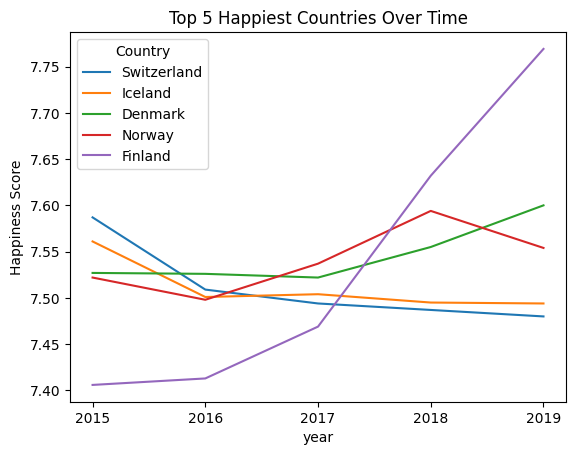

In [ ]:
top_5_countries = dataset[dataset['Country'].isin(['Switzerland', 'Denmark', 'Norway', 'Iceland', 'Finland'])]
sns.lineplot(x='year', y='Happiness Score', hue='Country', data=top_5_countries)
plt.title('Top 5 Happiest Countries Over Time')
plt.show()


The line plot illustrates the Happiness Score trends for the top 5 happiest countries (Switzerland, Denmark, Norway, Iceland, and Finland) over time.

- **Finland** shows consistent improvement in its Happiness Score year after year, with a steady upward trajectory.
- **Denmark** maintains a stable score until 2017, after which a slight improvement is observed.
- **Norway** displays inconsistency, with its score fluctuating in a zigzag pattern, rising and falling unpredictably over the years.
- **Switzerland** and **Iceland** experience a drop in their Happiness Score during the first year, but thereafter, their scores remain constant throughout the period analyzed.

These trends highlight the varying paths to happiness in these countries, with Finland and Denmark showing positive movements, while Switzerland, Iceland, and Norway exhibit more fluctuating patterns.

In [ ]:
for year in dataset['year'].unique():
    bottom_5_happiest = dataset[dataset['year'] == year].nsmallest(5, 'Happiness Score')[['Country', 'Happiness Score']]
    print(f"Top 5 Least Happy Countries in {year}:")
    print(bottom_5_happiest)


Top 5 Least Happy Countries in 2015:
     Country  Happiness Score
157     Togo            2.839
156  Burundi            2.905
155    Syria            3.006
154    Benin            3.340
153   Rwanda            3.465
Top 5 Least Happy Countries in 2016:
         Country  Happiness Score
314      Burundi            2.905
313        Syria            3.069
312         Togo            3.303
311  Afghanistan            3.360
310        Benin            3.484
Top 5 Least Happy Countries in 2017:
                      Country  Happiness Score
469  Central African Republic            2.693
468                   Burundi            2.905
467                  Tanzania            3.349
466                     Syria            3.462
465                    Rwanda            3.471
Top 5 Least Happy Countries in 2018:
                      Country  Happiness Score
625                   Burundi            2.905
624  Central African Republic            3.083
623               South Sudan            3.25

Below are the least happy countries for each year:

- **2015**: Togo, Burundi, Syria, Benin, Rwanda  
- **2016**: Burundi, Syria, Togo, Afghanistan, Benin  
- **2017**: Central African Republic, Burundi, Tanzania, Syria, Rwanda  
- **2018**: Burundi, Central African Republic, South Sudan, Tanzania, Yemen  
- **2019**: South Sudan, Central African Republic, Afghanistan, Tanzania, Rwanda  

From this analysis, we observe that **Burundi** consistently appears in the bottom 5 across all years, indicating ongoing challenges. Additionally, **Central African Republic**, **Tanzania**, and **Rwanda** frequently feature, underscoring long-standing issues affecting happiness in these regions.

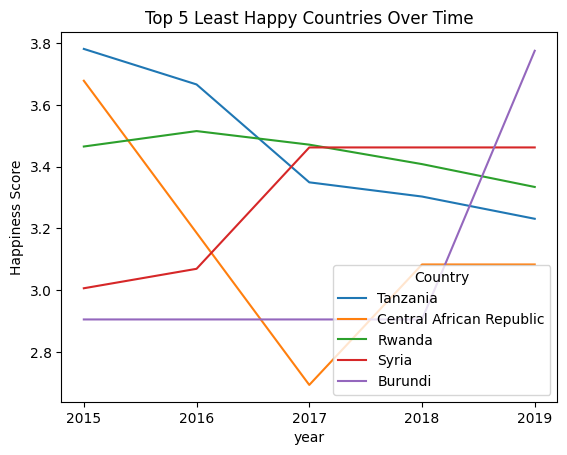

In [ ]:
bottom_5_countries = dataset[dataset['Country'].isin(['Central African Republic', 'Rwanda', 'Tanzania', 'Syria', 'Burundi'])]
sns.lineplot(x='year', y='Happiness Score', hue='Country', data=bottom_5_countries)
plt.title('Top 5 Least Happy Countries Over Time')
plt.show()

The line plot for the bottom 5 least happy countries (Central African Republic, Rwanda, Tanzania, Syria, and Burundi) over time highlights varying trends in their Happiness Scores:  

- **Syria** shows gradual improvements from an initial score of around 3, reaching slightly above 3.4 in 2017, and then maintaining a constant score for the subsequent years.  
- **Burundi** maintains a stable score near 2.9 until 2018, after which it gradually rises, reaching an all-time high of approximately 3.8 in 2019.  
- **Tanzania** starts with a relatively higher score of 3.8 in the first year but sees a consistent decline, reaching 3.2 by 2019.  
- **Rwanda** experiences a declining trend until after 2016, after which the score stabilizes.  
- **Central African Republic** faces a steep decline from almost 3.7 to a bottom low of around 2.6 in 2017. However, by the end of the period, it shows some recovery, reaching slightly above 3.  



Feature Impacts on Happiness Score

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    782 non-null    object 
 1   Happiness Rank             782 non-null    int64  
 2   Happiness Score            782 non-null    float64
 3   GDP per capita             782 non-null    float64
 4   Social support             782 non-null    float64
 5   Healthy life expectancy    782 non-null    float64
 6   Freedom                    782 non-null    float64
 7   Perceptions of corruption  782 non-null    float64
 8   Generosity                 782 non-null    float64
 9   year                       782 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 61.2+ KB


In [ ]:
numerical_columns = [col for col in dataset.columns if dataset[col].dtypes=='float64']
numerical_columns

['Happiness Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom',
 'Perceptions of corruption',
 'Generosity']

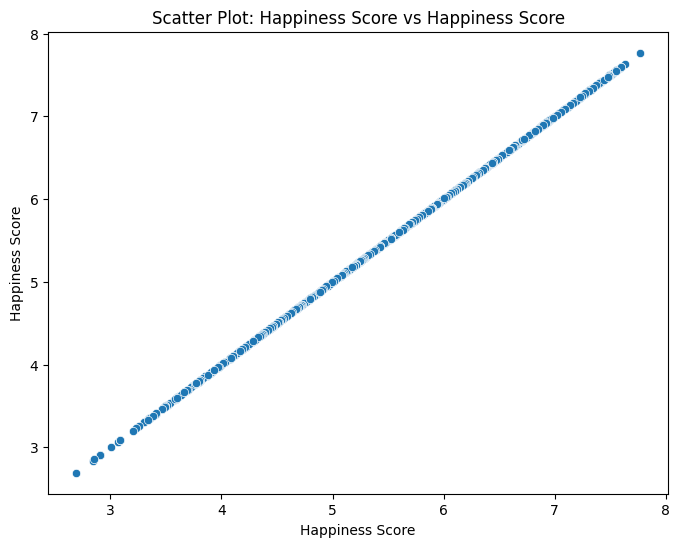

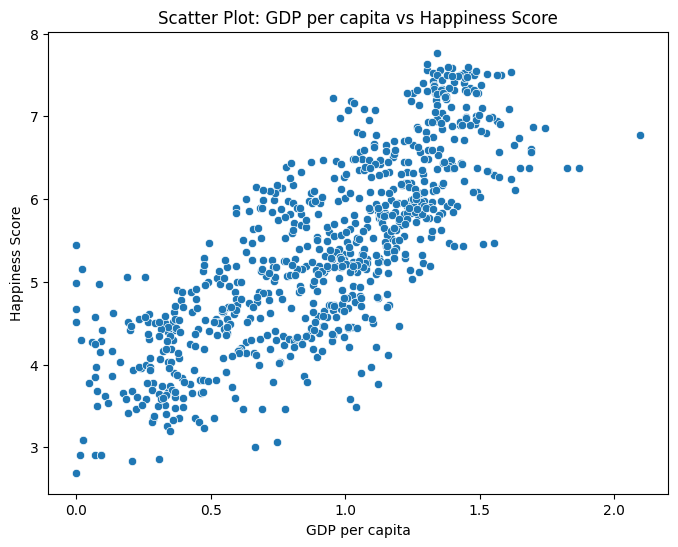

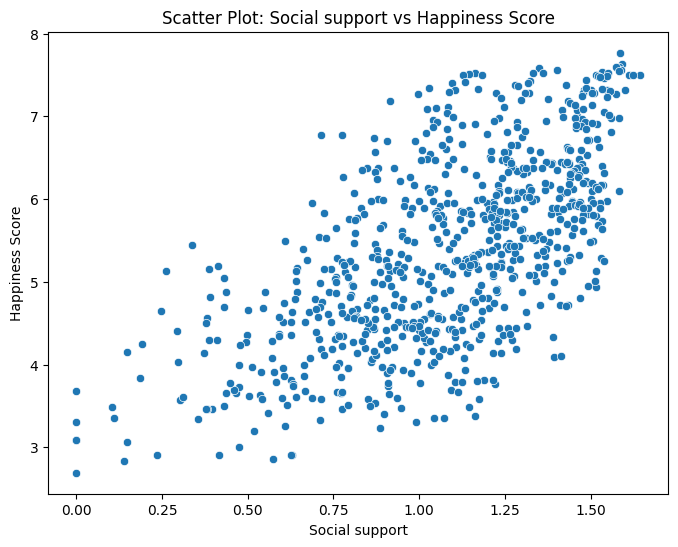

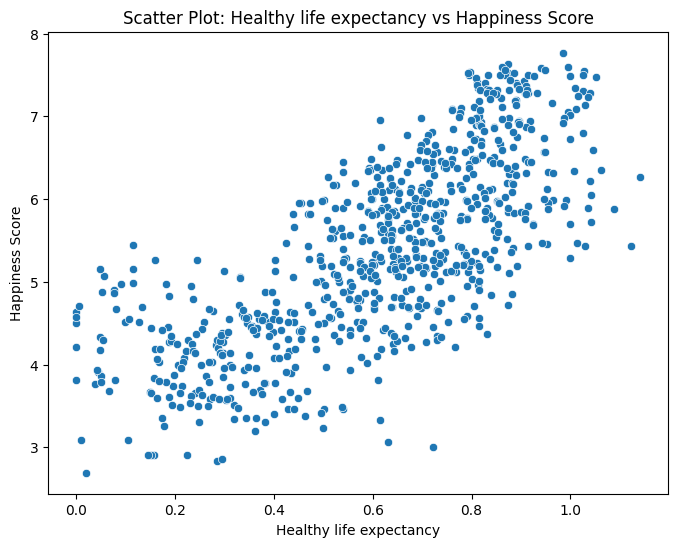

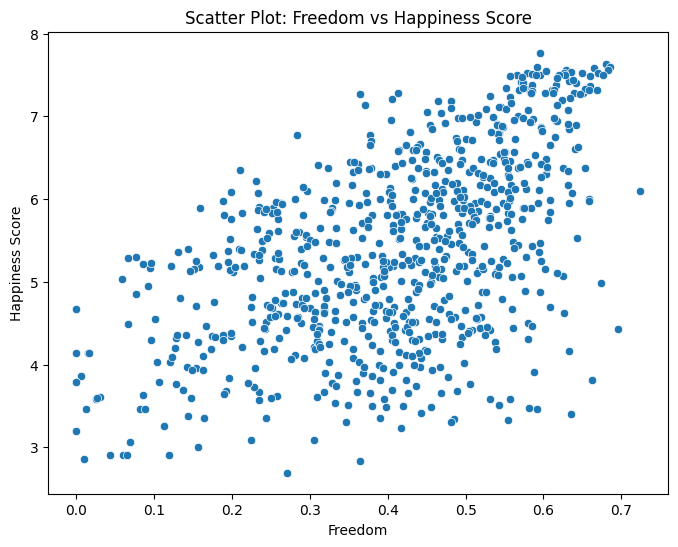

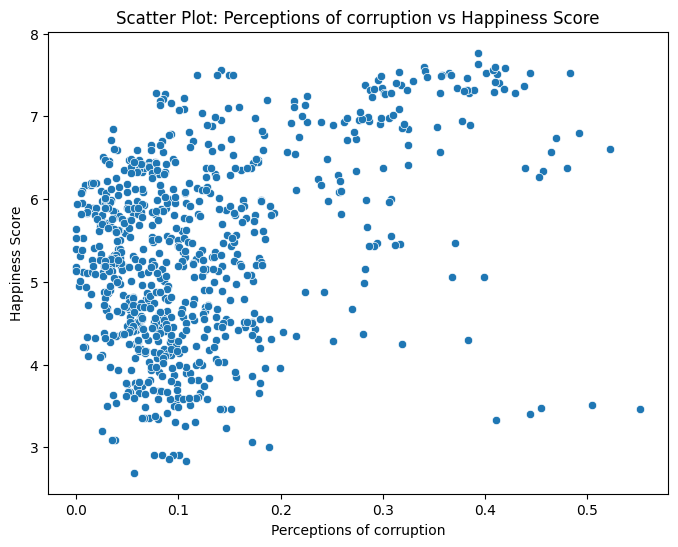

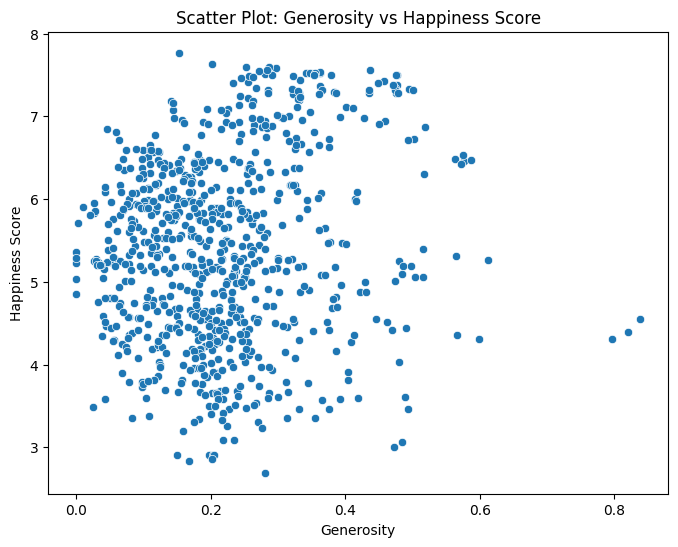

In [ ]:
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=dataset[col], y=dataset['Happiness Score'])
    plt.title(f'Scatter Plot: {col} vs Happiness Score')
    plt.xlabel(col)
    plt.ylabel('Happiness Score')
    plt.show()


The scatter plots of numerical features against the Happiness Score reveal insightful relationships:  

- **GDP per Capita**, **Healthy Life Expectancy**, and **Social Support** show the strongest positive relationships with Happiness Score, indicating that higher values in these features are associated with greater happiness levels.  
- **Freedom to Make Life Choices** and **Perception of Corruption** also exhibit positive relationships, though with a more moderate association.  
- **Generosity** demonstrates the weakest positive relationship with Happiness Score, suggesting a limited but still positive influence on happiness.  

Overall, the analysis highlights that economic stability, health, and social support are key contributors to happiness, while other features also play a supporting role.

In [ ]:
numerical_dataset = dataset[numerical_columns]
corr = numerical_dataset.corr()
corr

,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity
Happiness Score,1.000000,0.789284,0.648799,0.742456,0.551258,0.397484,0.137578
GDP per capita,0.789284,1.000000,0.585966,0.784338,0.340511,0.303427,-0.014560
Social support,0.648799,0.585966,1.000000,0.572650,0.420361,0.126707,-0.037262
Healthy life expectancy,0.742456,0.784338,0.572650,1.000000,0.340745,0.250390,0.010638
Freedom,0.551258,0.340511,0.420361,0.340745,1.000000,0.459705,0.290706
Perceptions of corruption,0.397484,0.303427,0.126707,0.250390,0.459705,1.000000,0.318995
Generosity,0.137578,-0.014560,-0.037262,0.010638,0.290706,0.318995,1.000000


<Axes: >

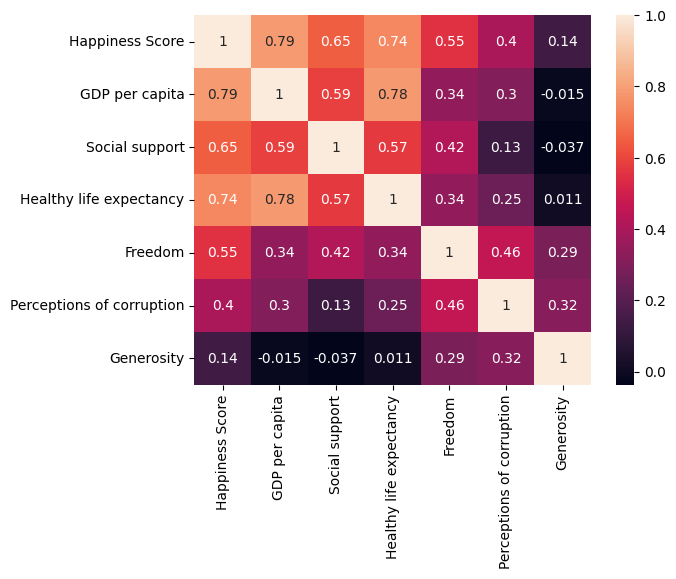

In [ ]:
sns.heatmap(corr, annot=True)

The Pearson correlation heatmap, much like the scatter plots, reveals strong positive relationships between Happiness Score and features like GDP per Capita, Healthy Life Expectancy, and Social Support, emphasizing their significant role in happiness.

#Model Training
The features GDP per Capita, Healthy Life Expectancy, Social Support, and Freedom have been selected as independent variables (X) to predict the target variable (y), Happiness Score. These variables were chosen based on their strong positive relationships with happiness, as observed in the scatter plots and Pearson correlation heatmap.

In [ ]:
y = dataset['Happiness Score']
X = dataset[["GDP per capita", "Healthy life expectancy", "Social support", "Freedom"]]

The dataset is split into training and testing sets using an 80-20 split.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Linear Regression is selected to predict the Happiness Score based on the chosen independent features: GDP per Capita, Healthy Life Expectancy, Social Support, and Freedom. The model is trained on the training data and used to make predictions on the test set

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


### Model Evaluation

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.3186492475806354
R-squared: 0.7380344017922006


The model evaluation results show a **Mean Squared Error (MSE)** of **0.3186**, indicating a low average squared difference between the predicted and actual values. The **R-squared (R²)** value of **0.7380** suggests that approximately **73.8%** of the variance in the **Happiness Score** is explained by the selected features, indicating that the model is performing well.

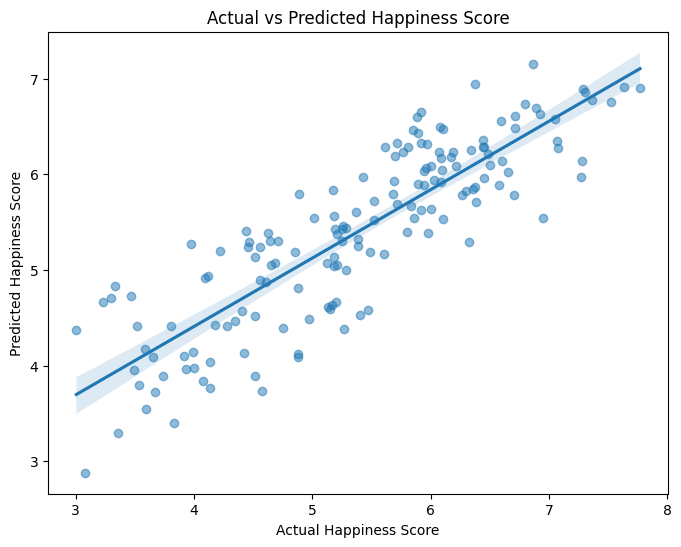

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5})
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs Predicted Happiness Score')
plt.show()

The scatter plot of Actual vs Predicted Happiness Score shows that while some predicted points are far from the best-fit line, the majority of the points are close to it, indicating that the residual error is generally small. Overall, the model's predictions are fairly accurate, with only a few outliers.